## Lista działów
- Python
- Dostępny software
- Matlab
- Artykuły naukowe

# Python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Wczytanie obrazu

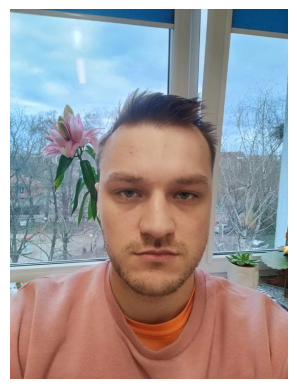

In [3]:
image_path = 'img.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

Rozmycia z biblioteki opencv

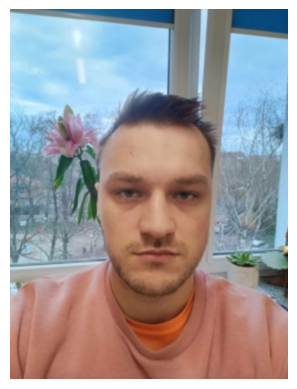

In [4]:
# Gaussian Blur
# Rozmycie Gaussa: Wykorzystuje rozkład Gaussa do rozmycia obrazu, redukując szum i detale.
gaussian_blur = cv2.GaussianBlur(image, (21, 21), 0)
image_rgb = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# (21, 21): oznacza, że jądro ma wymiary 21x21 pikseli
# 0: określa odchylenie standardowe w kierunku osi X dla rozkładu Gaussa

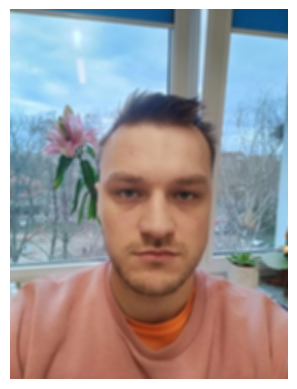

In [5]:
# Box Blur (rozmycie liniowe)
# Rozmycie liniowe: Proste rozmycie, w którym każdy piksel w wynikowym obrazie jest średnią wartością pikseli z sąsiedztwa w obrazie wejściowym. 
# Używane do osiągnięcia jednolitego efektu rozmycia.
box_blur = cv2.blur(image, (21, 21))
image_rgb = cv2.cvtColor(box_blur, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# (21, 21): oznacza, że jądro ma wymiary 21x21 pikseli

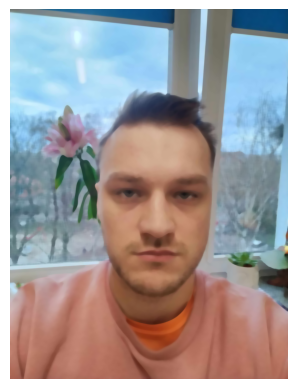

In [6]:
# Median Blur
# Rozmycie medianowe: Zastępuje każdy piksel medianą wartości z jego sąsiedztwa. 
# Skuteczne w redukcji szumu impulsowego, zachowując przy tym krawędzie obiektów.
median_blur = cv2.medianBlur(image, 21)
image_rgb = cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# 21: oznacza, że dla każdego piksela medianę oblicza się z wartości pikseli w kwadracie 21x21 pikseli

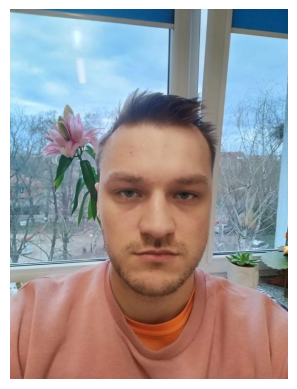

In [7]:
# Bilateral Blur
# Rozmycie dwumianowe: Rozmycie, które zmniejsza szum, jednocześnie zachowując ostre krawędzie. 
# Wykorzystuje różnice w intensywności do zachowania krawędzi.
bilateral_blur = cv2.bilateralFilter(image, 9, 75, 75)
image_rgb = cv2.cvtColor(bilateral_blur, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# 9: diameter, określa średnicę każdego piksela sąsiedztwa, który jest używany podczas filtracji

# 75: sigmaColor, określa filtr zakresu Gaussa w przestrzeni kolorów. 
# Wartość ta mówi, jak bardzo kolory w obrazie muszą różnić się od siebie, aby były traktowane jako różne. 
# Wartości bliskie sobie w przestrzeni kolorów będą uśredniane, podczas gdy wartości znacząco różniące się będą pozostawiane bez zmian.

# 75: sigmaSpace, określa filtr zakresu Gaussa w przestrzeni przestrzennej (spatial domain). 
# Wartość ta mówi, jak blisko siebie muszą znajdować się piksele, aby wpływały na siebie nawzajem.

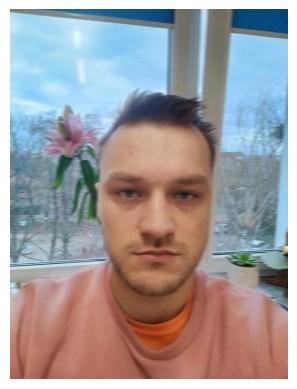

In [8]:
# Directional Blur
# Rozmycie w kierunku: Pozwala na rozmycie obrazu w określonym kierunku, imitując na przykład ruch.
# Wartość kernela dla przykładowego rozmycia w poziomie
kernel_size = 21
kernel = np.zeros((kernel_size, kernel_size))

# Ta linia kodu modyfikuje środkowy wiersz jądra, wypełniając go jedynkami. 
# Operacja ta skutkuje stworzeniem jądra, które będzie aplikować rozmycie przede wszystkim w kierunku poziomym, ponieważ jedynki (które "aktywują" piksele podczas konwolucji) znajdują się tylko w jednym wierszu.
kernel[int((kernel_size - 1)/2), :] = np.ones(kernel_size)

kernel = kernel / kernel_size

# Wykorzystując funkcję cv2.filter2D(), aplikuje stworzone jądro do obrazu image, uzyskując efekt rozmycia kierunkowego. 
# Parametr -1 oznacza, że głębia bitowa obrazu wynikowego będzie taka sama jak głębia obrazu wejściowego.
directional_blur = cv2.filter2D(image, -1, kernel)


image_rgb = cv2.cvtColor(directional_blur, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

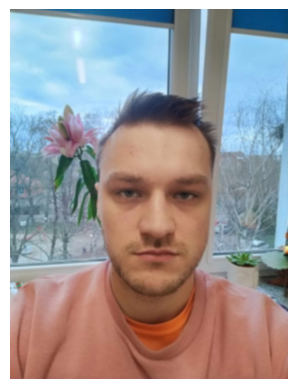

In [24]:
# Disk Blur
# Rozmycie dyskowe: Używa jądra w kształcie dysku do rozmycia obrazu, dając efekt miększy niż rozmycie boxowe
def create_disk_kernel(diameter):
    kernel = np.zeros((diameter, diameter), dtype=np.uint8)
    center = diameter // 2
    
    for x in range(diameter):
        for y in range(diameter):
            # Sprawdzenie, czy punkt znajduje się wewnątrz okręgu
            if (x - center) ** 2 + (y - center) ** 2 <= center ** 2:
                kernel[x, y] = 1
    
    # Normalizacja jądra, aby suma elementów była równa 1
    kernel = kernel / np.sum(kernel)
    return kernel

def apply_disk_blur(image, diameter):
    kernel = create_disk_kernel(diameter)
    blurred_image = cv2.filter2D(image, -1, kernel)
    return blurred_image

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

diameter = 15  # Średnica dysku
blurred_image = apply_disk_blur(image_rgb, diameter)

plt.imshow(blurred_image)
plt.axis('off')
plt.show()

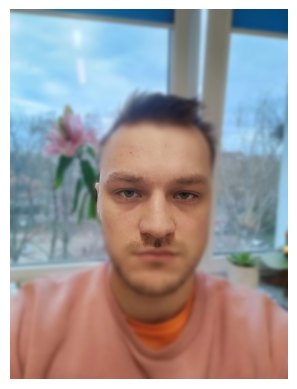

In [25]:
# Rozmycie Bokeh

# UWAGA: Ten nie działa dobrze, rozmazuje wszystko oprócz środka, czyli nie znajduje bliższych "obiektowi" elementów.

# Efekt wizualny charakteryzujący się miękkim, estetycznym rozmyciem punktów świetlnych na nieostrych obszarach zdjęcia. 
# Bokeh zależy od kształtu przysłony w obiektywie i jest szczególnie zauważalny w obiektywach o dużej przysłonie

def simulate_bokeh_effect(image_path, focus_depth, blur_strength):
    image = cv2.imread(image_path)
    # Załóżmy, że 'focus_depth' określa obszar, który ma pozostać ostry, a 'blur_strength' siłę rozmycia dla tła.
    # W praktyce, implementacja zależy od metody segmentacji obrazu i modelowania głębi ostrości.

    # Prosta symulacja polegałaby na rozmyciu całego obrazu
    blurred_background = cv2.GaussianBlur(image, (0, 0), blur_strength)

    # Stworzenie maski dla obszaru ostrego (na potrzeby przykładu użyjemy prostego kryterium)
    # W praktyce, wymagałoby to zaawansowanej segmentacji i analizy głębi
    mask = np.zeros(image.shape[:2], np.uint8)
    center = (int(image.shape[1]/2), int(image.shape[0]/2))
    cv2.circle(mask, center, focus_depth, (255), thickness=-1)

    # Stosowanie maski do oddzielenia ostrego obszaru od rozmytego tła
    foreground = cv2.bitwise_and(image, image, mask=mask)
    inverted_mask = cv2.bitwise_not(mask)
    background = cv2.bitwise_and(blurred_background, blurred_background, mask=inverted_mask)

    # Łączenie ostrego obiektu z rozmytym tłem
    result = cv2.add(foreground, background)
    return result

focus_depth = 300  # Przykładowa wartość, zależna od rozmiaru obrazu
blur_strength = 9  # Siła rozmycia

result_image = simulate_bokeh_effect(image_path, focus_depth, blur_strength)

image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


Ray Optics Simulator
https://ray-optics.readthedocs.io/en/latest/

Zapewnia podstawy geometrycznego śledzenia promieni (ang. ray tracing) do analizy systemów tworzących obrazy, a także systemów optyki koherentnej. Na tej bazie dostępny jest szereg standardowych opcji analizy geometrycznej, takich jak analiza aberracji poprzecznej promienia i czoła fali. Obsługiwane jest również paraksjalne rozmieszczenie układów optycznych za pomocą wykresów y-y¯ i ω-ω¯ oraz graficzna edycja promieni paraksjalnych w widokach układów soczewek. Obsługiwany jest import plików Zemax .zmx i CODEV .seq. RayOptics może być używana w skryptach Pythona, interpreterach Python i IPython, notatniku Jupyter oraz aplikacji z graficznym interfejsem użytkownika opartym na Qt.

# Dostępny software

### Wymienienie rozmyć:

Rozmycie Bokeh: Efekt wizualny charakteryzujący się miękkim, estetycznym rozmyciem punktów świetlnych na nieostrych obszarach zdjęcia. Bokeh zależy od kształtu przysłony w obiektywie i jest szczególnie zauważalny w obiektywach o dużej przysłonie, tworząc piękne, okrągłe, nieostrze kształty światła na tle.

- Photoshop https://www.youtube.com/watch?v=fN0YWw1qJXQ
- GIMP https://www.youtube.com/watch?v=GpGfcHcSX4s, 


Rozmycie sferyczne (Spherical Aberration Blur): Występuje, gdy promienie świetlne przechodzące przez soczewkę nie są równomiernie ogniskowane, co prowadzi do powstania obrazu, który może wydawać się rozmyty lub posiadać nierównomierną ostrość. Jest to rodzaj aberracji soczewki.

Rozmycie chromatyczne (Chromatic Aberration Blur): Efekt wynikający z różnicy w załamaniu światła różnych długości fal przez soczewkę, co powoduje pojawienie się kolorowych obrzeży wokół obiektów. W obróbce cyfrowej może być symulowane do dodania wizualnego "flairu" lub korekty w zdjęciach.

- Photoshop https://www.youtube.com/watch?v=vEsw38udx-M
- GIMP https://www.youtube.com/watch?v=iMep8NMo6kI
- Raw Therapee https://rawpedia.rawtherapee.com/Chromatic_Aberration

Rozmycie ruchu (Motion Blur): Choć technicznie nie jest to efekt wynikający wyłącznie z właściwości soczewek, jest często wykorzystywane w fotografii do przekazania poczucia ruchu. W kontekście soczewek, szybkość przesuwania soczewki lub obiektu może spowodować ten efekt na zdjęciu.

Rozmycie tilt-shift: Efekt uzyskany za pomocą specjalnych soczewek tilt-shift lub przez symulację w obróbce cyfrowej. Pozwala na selektywne ostrość w części obrazu, imitując wygląd miniatury poprzez ograniczoną głębię ostrości.

- Photoshop: https://www.youtube.com/watch?v=XJvNT2CYeKc


Rozmycie astygmatyczne: Rodzaj aberracji, gdzie obraz punktowy jest rozmyty w dwóch prostopadłych kierunkach. Występuje, gdy soczewka nie ma tej samej mocy optycznej w każdym kierunku.

Rozmycie winietowania: Ciemnienie krawędzi kadru, często pożądany efekt w fotografii portretowej i krajobrazowej, może być również rozumiane jako rodzaj "rozmycia", ponieważ przyciąga uwagę do centrum obrazu.

### Lista blur dla photoshop:

https://www.youtube.com/watch?v=vMitAUHBy5Q
- Gausion Blur
- 'Average' Blur Tool
- Box Blur
- Motion Blur
- Smart Blur Surface Blur

https://www.youtube.com/watch?v=ZLXt45tPlBk
- 'Average' Blur Tool
- Box Blur
- Lense Blur
- Motion & Radial Blurs
- Shape Blur
- Smart Blur
- Surface Blur
- Field Blur
- Iris Blur
- Tilt Shift Blur Effect
- Path Blur
- Spin Blur

Rozmycie Gaussa (Gaussian Blur): Zmniejsza szczegóły i szumy poprzez rozmycie obrazu z wykorzystaniem rozkładu normalnego (Gaussa). Pozwala na miękkie rozmycie obrazu, co jest użyteczne w wielu scenariuszach, od retuszu po tworzenie tła.

Rozmycie Średnie ('Average' Blur Tool): Zamienia każdy piksel na obrazie średnią wartością koloru z jego otoczenia. To prosty sposób na uzyskanie bardzo jednolitego efektu rozmycia.

Box Blur: Rozmywa obraz za pomocą prostokątnego jądra, dając efekt bardziej jednolitego rozmycia niż Gaussian Blur, ale z mniej miękkimi krawędziami.

Rozmycie Soczewkowe (Lens Blur): Symuluje efekt głębi ostrości uzyskiwany za pomocą prawdziwych obiektywów aparatu, w tym efekt bokeh. Pozwala na bardziej zaawansowane kontrolowanie rozmycia, w zależności od odległości od punktu ostrości.

Rozmycia Ruchu i Radialne (Motion & Radial Blurs): Motion Blur naśladuje efekt ruchu, rozmywając obraz w określonym kierunku, natomiast Radial Blur rozmywa obraz promieniście, naśladując obrót lub ruch zbliżenia/oddalenia.

Shape Blur: Umożliwia użycie niestandardowego kształtu jako jądra rozmycia, co pozwala na tworzenie unikatowych efektów rozmycia zależnych od wybranego kształtu.

Smart Blur: Oferuje zaawansowaną kontrolę nad rozmyciem, umożliwiając wygładzenie obrazu przy zachowaniu wyraźnych krawędzi i szczegółów. Idealne do poprawiania zdjęć i grafik.

Surface Blur: Zachowuje ostre krawędzie podczas rozmywania powierzchni, redukując szumy i niedoskonałości bez utraty ważnych szczegółów obrazu.

Field Blur: Pozwala na tworzenie płynnych przejść rozmycia w różnych częściach obrazu, oferując kontrolę nad intensywnością efektu w zależności od miejsca.

Iris Blur: Symuluje małą głębię ostrości poprzez rozmycie otoczenia wybranego punktu ostrego, imitując efekt zdjęcia wykonanego z użyciem dużego otworu przysłony.

Tilt Shift Blur Effect: Imituje wygląd fotografii tilt-shift, gdzie tylko mała część obrazu pozostaje ostra, a reszta jest rozmyta, co często używane jest do nadawania zdjęciom wyglądu miniatur.

Path Blur: Umożliwia symulowanie ruchu wzdłuż niestandardowej ścieżki, oferując unikatową kontrolę nad kierunkiem i kształtem rozmycia.

Spin Blur: Naśladuje efekt obrotu, pozwalając na rozmycie części obrazu w sposób symulujący obracanie się, idealne do kołowych obiektów jak koła.

### Informacje dla Raw Therapee
https://rawpedia.rawtherapee.com/Local_Adjustments

Gaussian Blur-Noise-Grain, Median i Guided Filter

EN:

Gaussian Blur - Noise - Grain
Radius: a Gaussian filter is applied. Blur is active only if Radius is greater than or equal to 1.6. By reducing the default value of Scope and adjusting just the Luminance, it is possible to obtain differentiated blurs as a function of the hue Radius.
Noise: Luminance noise is added to the image.
Film Grain:
Coarseness with 2 settings.
Distribution: simulates the ISO number.
Gamma: changes the distribution of the effect. The higher the value, the more the effect.
Strength: sets the intensity.
Scale: the default value is set to 100.

Median
You can choose between 3x3, 5X5, 7X7, 9X9 and the number of passes from 1 to 4 (these medians are directly derived from those used in Denoise).

Guided Filter
You can select “Soft radius”, Strength and Detail, all of which affect the impression of strength.

PL:

Rozmycie Gaussa - Szum - Ziarno
Promień: stosowany jest filtr Gaussa. Rozmycie jest aktywne tylko, jeśli promień jest większy lub równy 1,6. Redukując domyślną wartość Zakresu i dostosowując jedynie Luminancję, możliwe jest uzyskanie zróżnicowanych rozmyć w funkcji od promienia barwy.
Szum: Do obrazu dodawany jest szum luminancji.
Ziarno filmu:
Zgrubienie z dwoma ustawieniami.
Dystrybucja: symuluje liczbę ISO.
Gamma: zmienia dystrybucję efektu. Im wyższa wartość, tym silniejszy efekt.
Siła: ustawia intensywność.
Skala: domyślna wartość jest ustawiona na 100.

Medianowy
Można wybrać pomiędzy 3x3, 5x5, 7x7, 9x9 oraz liczbę przejść od 1 do 4 (te mediany są bezpośrednio pochodne od tych używanych w Redukcji Szumu).

Filtr Kierunkowy
Można wybrać "Miękki promień", Siłę i Szczegół, które wszystkie wpływają na wrażenie siły.

-----------------------------------------------------------------------------------------------

EN:

Blur Mask
The Blur mask, which generates a large-radius blur, allows the user to vary the image contrast and lighten or darken selected parts of the image (using Color & Light).

Contrast threshold: allows you to select the parts of the image that will be affected based on the texture.
Radius: allows you to vary the radius of the Gaussian blur in the range 0 to 500.
FFTW checkbox: uses a Fourier transform to improve the quality (increases processing time and memory requirements).
Note that this checkbox is only available in Advanced mode. In other modes without FFTW, the radius is limited to 100.

PL:

Maska Rozmycia
Maska Rozmycia, która generuje rozmycie o dużym promieniu, pozwala użytkownikowi na zmianę kontrastu obrazu oraz rozjaśnianie lub przyciemnianie wybranych części obrazu (przy użyciu Koloru i Światła).

Próg kontrastu: pozwala wybrać części obrazu, które będą dotknięte na podstawie tekstury.
Promień: pozwala zmienić promień rozmycia Gaussa w zakresie od 0 do 500.
Pole wyboru FFTW: używa transformacji Fouriera do poprawy jakości (zwiększa czas przetwarzania i wymagania pamięciowe).
Należy zauważyć, że to pole wyboru jest dostępne tylko w trybie Zaawansowanym. W innych trybach bez FFTW, promień jest ograniczony do 100.

-----------------------------------------------------------------------------------------------------------

- Bilateral Filter
The ‘Bilateral filter is a replica of the Impulse Noise Reduction filter in the main-menu Detail tab. It’s primary function is to reduce the salt & pepper noise often found in black and white images but it can also filter other types of impulse noise.


- Filtr Dwustronny
'Filtr Dwustronny' jest repliką filtra Redukcji Szumu Impulsowego znajdującego się w zakładce Szczegóły głównego menu. Jego główną funkcją jest redukcja szumu typu 'sól i pieprz', często występującego na obrazach czarno-białych, ale może on również filtrować inne typy szumów impulsowych.

---------------------------------------------------------------------------------------------------------

Dostępne zaimplementowanie Graduated filter:

Graduated filter, znany także jako stopniowy filtr lub filtr gradientowy, to narzędzie używane w fotografii do stopniowej zmiany ekspozycji, koloru lub innych aspektów obrazu od jednego końca do drugiego. W fotografii tradycyjnej, graduated filters to fizyczne filtry, które umieszcza się przed obiektywem aparatu; jedna część filtra jest przezroczysta, podczas gdy druga posiada pewien stopień zaciemnienia lub koloru, z płynnym przejściem między nimi.

W kontekście oprogramowania do obróbki obrazu, takiego jak Raw Therapee czy Adobe Photoshop, graduated filter to cyfrowe narzędzie, które symuluje efekt stosowania fizycznego filtra gradientowego. Umożliwia ono użytkownikowi zastosowanie efektu, który stopniowo zmienia się na obrazie, na przykład rozjaśniając lub przyciemniając niebo bez wpływu na pozostałą część zdjęcia, czy też dodając kolor do określonej części obrazu. Dzięki temu można osiągnąć bardziej zrównoważoną ekspozycję na całym zdjęciu lub dodać kreatywne efekty.

### Inne

Zemax, OpticStudio, OSLO (Optics Software for Layout and Optimization) – profesjonalne oprogramowanie do projektowania i analizy systemów optycznych, które umożliwiają szczegółową symulację działania soczewek i systemów optycznych.

Są one profesjonalnymi narzędziami do projektowania, analizy i optymalizacji systemów optycznych, a ich główne zastosowanie skupia się na inżynierii optycznej i symulacji systemów optycznych przed ich fizycznym wykonaniem. Te programy są przede wszystkim używane do modelowania zachowania światła w systemach optycznych, takich jak soczewki, a także w bardziej złożonych układach optycznych. Ich podstawowym celem jest pomoc w projektowaniu i optymalizacji elementów optycznych, aby spełniały one określone wymagania optyczne i wizualne.

Nie są one przeznaczone do bezpośredniego przetwarzania już zrobionych zdjęć w sposób, w jaki robią to oprogramowania do edycji obrazów takie jak Adobe Photoshop czy Raw Therapee.

Mogą one być używane do symulacji efektów optycznych, które można by oczekiwać od użycia określonych soczewek czy systemów optycznych, takich jak dystorsja, aberracje chromatyczne, głębia ostrości, a następnie teoretyczne efekty mogą być użyte jako wytyczne do modyfikowania zdjęć w dedykowanym oprogramowaniu do edycji obrazów. Na przykład, można użyć Zemax do przewidzenia, jak soczewka wpłynie na obraz, a potem starać się odtworzyć te efekty w Photoshopie.

W skrócie, Zemax i OSLO służą głównie do projektowania i analizy optycznej przed produkcją, a nie do przetwarzania czy modyfikacji już zrobionych zdjęć.

# Matlab

Nie znalazłem bibliotek ani rozszerzeń które radziłyby sobie lepiej niż python.

# Artykuły naukowe

Nie zdążyłem jeszcze dobrze przejrzeć tych artykułów ale wymienie te które mogą być w jakiś sposób przydane bo Abstrakcie:

#### Simulation of image blur
https://ieeexplore.ieee.org/abstract/document/5653948

Interfejs użytkownika oparty na MATLAB z modułami obliczeniowymi symulującymi rozmycie obrazu za pomocą Funkcji Transferu Modulacji (MTF), szczególnie w warunkach dominujących efektów degradacji atmosferycznej

Abstract:
W tej pracy przedstawiono oparty na MATLAB-ie interfejs użytkownika z różnymi modułami obliczeniowymi, które symulują rozmycie obrazu za pomocą funkcji przenoszenia modulacji (MTF). Zniekształcenie obrazu w systemie obrazowania następuje poprzez rozmycie obrazu i szum. Stopień rozmycia obrazu zależy od charakterystyki układu optycznego, sensora, elektroniki za sensorem; warunków atmosferycznych; oraz charakterystyki ruchu platformy, na której znajduje się urządzenie obrazujące. W tej pracy rozmycie obrazu jest symulowane za pomocą MTF, szczególnie w warunkach, w których dominują efekty degradacji atmosferycznej. Po wybraniu obrazu przez użytkownika, do obrazu zostaje dodane rozmycie spowodowane komponentami systemu obrazowania oraz różnymi warunkami atmosferycznymi, aby uzyskać obraz wynikowy. Użytkownik może swobodnie określać wartości parametrów określających stopień rozmycia obrazu. Poprzez zastosowanie generatorów obrazów syntetycznych, praca ta może być wykorzystana do zwiększenia wydajności algorytmów detekcji, śledzenia i odtwarzania obrazu.

#### Real-time human vision rendering using blur distribution function

https://dl.acm.org/doi/abs/10.1145/2817675.2817686

Metoda renderowania w czasie rzeczywistym oparta na funkcji rozkładu rozmycia (BDF) ludzkiego oka, mająca na celu osiągnięcie efektu wizualnie realistycznego.

Abstract: W tej pracy proponujemy metodę renderowania w czasie rzeczywistym opartą na funkcji rozkładu rozmycia (Blur Distribution Function, BDF) ludzkiego oka, aby uzyskać efekt realistyczny wizualnie. W renderowaniu w czasie rzeczywistym powszechnie stosuje się model aparatu cienkiej soczewki, aby symulować efekt głębi ostrości (Depth of Field, DoF). Model cienkiej soczewki jest wydajny obliczeniowo, ale brakuje mu realistycznego efektu wizualnego. Uważamy, że symulacja ludzkiego widzenia jest udoskonaleniem wirtualnej rzeczywistości. W tym artykule analizujemy i modelujemy BDF ludzkiego oka. BDF jest szybko obliczana przez sieć neuronową, aby symulować rozmiar rozmycia dla każdego piksela. Nasza metoda, oparta na schematycznym modelu oka, który zapewnia dokładne właściwości optyczne ludzkiego oka, pokazuje efekt DoF symulujący ludzkie widzenie. Wyniki oceny wskazują, że efekt renderowania naszej metody jest zgodny z ludzkim widzeniem, a dodatkowy koszt obliczeniowy jest akceptowalny.

#### Real-time lens blur effects and focus control

https://dl.acm.org/doi/abs/10.1145/1778765.1778802

System renderowania dla rozmycia poza ostrością i efektów soczewek, wspierający fizycznie oparte renderowanie i przewyższający poprzednie podejścia dzięki nowej metodzie śledzenia opartej na GPU. Metoda ta osiąga większą precyzję niż konkurencyjne rozwiązania w czasie rzeczywistym i jest w stanie symulować artystyczne soczewki

Abstract: Przedstawiamy nowatorski system renderowania dla efektu rozmycia ostrości i efektów obiektywu. System ten wspiera renderowanie oparte na prawach fizyki i przewyższa dotychczasowe podejścia dzięki zastosowaniu nowatorskiej, opartej na GPU metodzie śledzenia (ang. tracing). Nasze rozwiązanie osiąga większą precyzję niż konkurencyjne rozwiązania czasu rzeczywistego, a nasze wyniki są w większości nieodróżnialne od renderowania offline. Nasza metoda jest również bardziej ogólna i może integrować zaawansowane symulacje, takie jak proste geometryczne modele obiektywów umożliwiające różne efekty aberracji obiektywu. Te ostatnie są kluczowe dla realizmu, ale często są także wykorzystywane w kontekstach artystycznych. Pokazujemy, że dostępne obiektywy artystyczne mogą być symulowane przez naszą metodę. W tym duchu nasza praca wprowadza intuicyjną kontrolę nad efektami głębi ostrości. Baza fizyczna jest kluczowa jako punkt wyjściowy do umożliwienia nowych artystycznych renderingów opartych na uogólnionej powierzchni ogniskowej, aby podkreślić poszczególne elementy sceny przy zachowaniu realistycznego wyglądu. Nasze rozwiązanie czasu rzeczywistego zapewnia realistyczne, a także wiarygodne, ekspresyjne rezultaty.

#### Photo-consistent synthesis of motion blur and depth-of-field effects with a real camera mode

https://www.sciencedirect.com/science/article/abs/pii/S0262885612001096

Metoda generowania realistycznych efektów DOF i rozmycia ruchu na podstawie charakterystyk rzeczywistego systemu kamerowego.

Abstract: Głębia ostrości (DOF) i rozmycie ruchu (motion blur) to ważne wizualne wskazówki wykorzystywane w grafice komputerowej i fotografii do zilustrowania punktu skupienia uwagi oraz ruchu obiektu. W tej pracy prezentujemy metodę generowania fotorealistycznej głębi ostrości i rozmycia ruchu, opartą na właściwościach rzeczywistego systemu kamerowego. Modelowane są zarówno zależność głębi ostrości od różnych ustawień ostrości kamery, jak i nieliniowa odpowiedź intensywności czujników obrazu. Parametry kamery są kalibrowane i wykorzystywane do syntezy efektu rozogniskowania oraz rozmycia ruchu. Dla dobrze zogniskowanego obrazu rzeczywistej sceny, efekty DOF i rozmycia ruchu są generowane za pomocą technik przetwarzania końcowego. Eksperymenty wykazały, że proponowana metoda generuje wyniki bardziej spójne ze zdjęciami niż powszechnie stosowane modele graficzne.

#### Simulating real-world scenes viewed through ophthalmic lenses

https://opg.optica.org/josaa/abstract.cfm?uri=josaa-34-8-1301

Procedura symulacji scen z rzeczywistego świata widzianych przez soczewki okulistyczne, umożliwiająca przewidywanie efektów na formację obrazu wynikających z połączonych wad optycznych typowych dla soczewek okulistycznych.

Abstract:
